### Прогноз популярности статьи на Хабре
### https://habr.com/ru/company/ods/blog/323730/


In [1]:
import pandas as pd

habr_df = pd.read_csv('howpop_train.csv')
habr_df['published'] = pd.to_datetime(habr_df.published)
habr_df = habr_df[['published', 'url']]

aggr_habr_df = habr_df.groupby('published')[['url']].count() 
aggr_habr_df.columns = ['posts']

aggr_habr_df = aggr_habr_df.resample('D').apply(sum)

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

# инициализируем plotly
init_notebook_mode(connected = True)

# опишем функцию, которая будет визуализировать все колонки dataframe в виде line plot
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

plotly_df(aggr_habr_df.resample('W').apply(sum), title = 'Опубликованные посты на Хабрахабре')

In [3]:
from fbprophet import Prophet

predictions = 30

# приводим dataframe к нужному формату
df = aggr_habr_df.reset_index()
df

,published,posts
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
...,...,...
3222,2016-10-27,58
3223,2016-10-28,53
3224,2016-10-29,14
3225,2016-10-30,27


In [5]:

df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 30 точек, чтобы измерить на них качество
train_df = df[:-predictions] 
df

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
...,...,...
3222,2016-10-27,58
3223,2016-10-28,53
3224,2016-10-29,14
3225,2016-10-30,27


In [5]:
m = Prophet()
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,17.048337,4.391235,33.113212,17.048337,17.048337,1.565119,1.565119,1.565119,11.745548,11.745548,11.745548,-10.180429,-10.180429,-10.180429,0.0,0.0,0.0,18.613456
1,2008-01-02,17.071276,2.185495,31.362930,17.071276,17.071276,-0.616703,-0.616703,-0.616703,9.760685,9.760685,9.760685,-10.377388,-10.377388,-10.377388,0.0,0.0,0.0,16.454573
2,2008-01-03,17.094215,0.070984,29.382416,17.094215,17.094215,-1.995964,-1.995964,-1.995964,8.473826,8.473826,8.473826,-10.469789,-10.469789,-10.469789,0.0,0.0,0.0,15.098251
3,2008-01-04,17.117154,-4.235578,25.583603,17.117154,17.117154,-5.802439,-5.802439,-5.802439,4.652858,4.652858,4.652858,-10.455297,-10.455297,-10.455297,0.0,0.0,0.0,11.314715
4,2008-01-05,17.140093,-31.050792,-2.790236,17.140093,17.140093,-33.663357,-33.663357,-33.663357,-23.330136,-23.330136,-23.330136,-10.333221,-10.333221,-10.333221,0.0,0.0,0.0,-16.523264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,2016-10-27,57.437514,53.490563,83.844191,57.437453,57.437514,10.768017,10.768017,10.768017,8.473826,8.473826,8.473826,2.294192,2.294192,2.294192,0.0,0.0,0.0,68.205531
3223,2016-10-28,57.436187,48.861974,79.322615,57.435366,57.436187,6.967118,6.967118,6.967118,4.652858,4.652858,4.652858,2.314259,2.314259,2.314259,0.0,0.0,0.0,64.403305
3224,2016-10-29,57.434861,21.764589,50.238746,57.433897,57.434861,-21.011788,-21.011788,-21.011788,-23.330136,-23.330136,-23.330136,2.318349,2.318349,2.318349,0.0,0.0,0.0,36.423073
3225,2016-10-30,57.433534,24.381409,53.519262,57.431714,57.433534,-18.583076,-18.583076,-18.583076,-20.890127,-20.890127,-20.890127,2.307051,2.307051,2.307051,0.0,0.0,0.0,38.850458


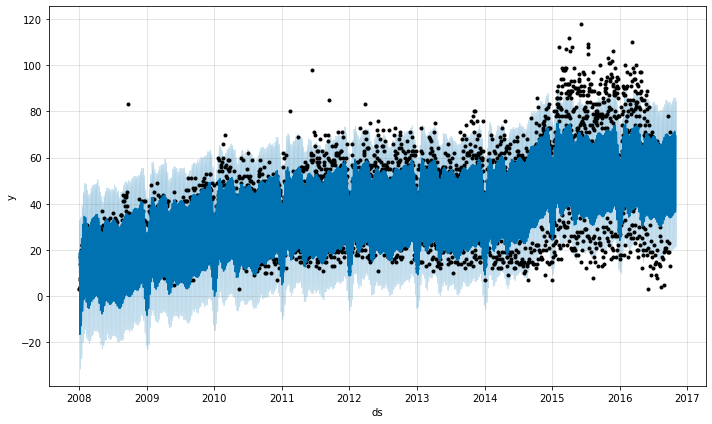

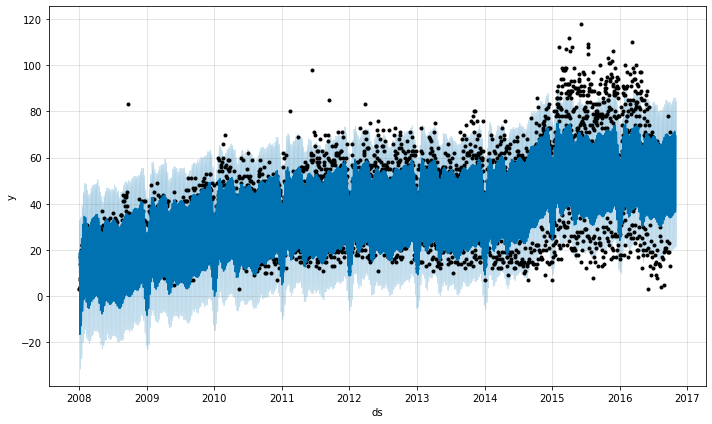

In [7]:
m.plot(forecast)

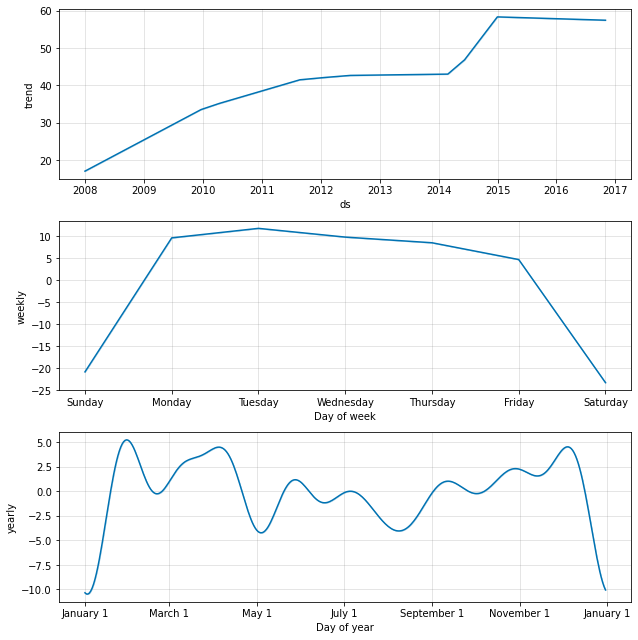

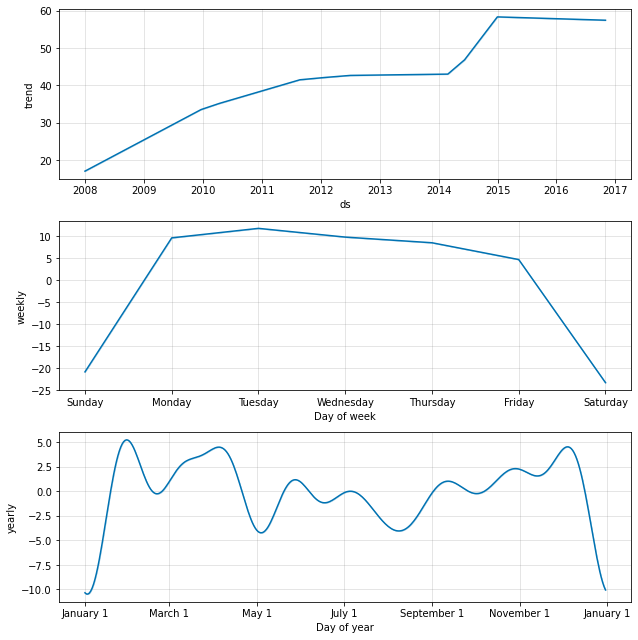

In [8]:
m.plot_components(forecast)

In [9]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [18]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df.head(-20)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2008-01-01,18.613456,4.391235,33.113212,3
2008-01-02,16.454573,2.185495,31.362930,3
2008-01-03,15.098251,0.070984,29.382416,4
2008-01-04,11.314715,-4.235578,25.583603,14
2008-01-05,-16.523264,-31.050792,-2.790236,4
...,...,...,...,...
2016-10-07,62.124767,46.747570,77.162329,43
2016-10-08,34.231681,19.633869,48.861229,12
2016-10-09,36.774637,21.452112,52.153708,21


In [12]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE 39.29026054757653
MAE 11.184503612977307


In [14]:
# функция для визуализации построенного прогноза
def show_forecast(cmp_df, num_predictions, num_values):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines',
        marker=dict(color="444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(predictions).index,
        y=cmp_df.tail(predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        marker=dict(color="444"),
        line=dict(width=0),
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    # последовательность рядов в данном случае важна из-за применения заливки
    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='Посты'),
        title='Опубликованные посты на Хабрахабре',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, predictions, 200)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.marker
        Received value: '444'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to scatter.marker.colorscale
      - A list or array of any of the above